# SI 671/721 Homework 1: Itemset Mining (Total 100 Points)

## Academic Integrity Policy for Homework

Unless otherwise specified in the homework, all submitted work must be your own original work. Any excerpts, statements, or phrases from the work of others must be clearly identified as a quotation, with proper citation provided. Any violation of the University’s policies on Academic and Professional Integrity may result in serious penalties, ranging from failing a homework assignment to failing the course, or even expulsion from the program. Violations of academic and professional integrity will be reported to the appropriate authorities. Consequences of academic misconduct are determined by the faculty instructor, and additional sanctions may also be imposed.

**Collaboration with Classmates**

* You may discuss homework problems with classmates or friends (no more than two friends), but you must disclose their names in your submission if you do so.
* Even when you collaborate, your code and written answers must be your own. Submissions that are too similar may be flagged by automated code similarity checkers and necessitate instructors to investigate further to decide if any academic integrity violations have occurred.

**Use of Large Language Models (LLMs)**

* Consulting LLMs such as ChatGPT is not prohibited, but you must disclose in your submission if you used them for consulting. Consulting LLMs does not lead to any penality or reduction in your points.
* The code and written work you submit must be your own. Do not copy and paste from an LLM or follow its output blindly.
* LLMs can produce errors, omit important details, or misinterpret the assignment. You are fully responsible for checking your work, correcting mistakes, and ensuring your submission reflects your own understanding. If submissions are suspected to contain direct copied-and-pasted work from LLMs, instructors will investigate further to decide if any academic integrity violations have occurred.

If you have any collaboration or use of LLMs to disclose, please use the Disclosure Template below


---

## Disclosure (Edit this Markdown cell to disclose, if any)

**Collaboration:** I discussed this assignment with [full name(s) of classmates or friends].

**LLM Use:** I consulted [ChatGPT / other LLM] for [debugging ideas / clarification / brainstorming], but the final code and written answers are my own.  

---

# Homework Tasks Summary

For this assignment, we sampled ~10 thousand Tweets with two or more food/drink emojis. You will represent this dataset as a collection of itemsets and practice what we learned in class - mining and evaluating frequent itemsets, and calculating the similarity of itemsets. Specifically, we want ask a question "Which food and drink emojis are frequently used together in Tweets?" 

**Disclaimer:** The data are collected from the real world. As you step into the wild, things might not always be nice and clean. Although we, the instructing team, have tried our best effort to filter out Tweets containing poisonous vocabularies and links, it is still possible that you will encounter offensive contents.

## Details

#### Data

You have been provided with a folder - ‘itemsets_data’ - that contains all of the data for this assignment. This folder contains the following data files:
- food_drink_emoji_tweets.txt
- food_emoji_frequent_2_itemsets.csv

#### Packages

We recommend using the following Python packages in this assignment:
- pandas
- numpy
- sklearn
- matplotlib
- mlxtend

#### Assignment Structure

This homework is divided into the following parts:

- Part 1: Data Exploration
- Part 2: The Apriori Algorithm
- Part 3: Evaluating Frequent Itemsets
- Part 4: Itemset Similarity

In [1]:
# IMPORT ALL NEEDED PACKAGES FOR ASSIGNMENT; No other pacakges are necessary
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1. Data Exploration [20 points]

This part of the assignment is designed to help familiarize yourself with the dataset and basic concepts of itemset mining. The insights from this part will help guide your approach for the remainder of the assignment.

### 1.1 Load & Transform the Twitter emoji dataset [11 points]
a) **[3 points]** First, read in the **itemsets_data/food_drink_emoji_tweets.txt** file and create a pandas DataFrame (`tweets_df`) with the contents. You should find that every line of the data is a Tweet.

In [2]:
tweets = []
with open("./itemsets_data/food_drink_emoji_tweets.txt", 'r') as f:
    for line in f.readlines():
        tweets.append(line)

tweets_df = pd.DataFrame(data={'tweets':tweets})


b) **[3 points]** Using this DataFrame, extract the emojis that appear in each Tweet as an itemset. For this assignment, we are only interested in emojis that are food and drink. As such, you are supplied with the following code to filter to food and drink emojis:

emoji_set = {'🍫', '🍡', '🍏', '🍈', '🍯', '🥠', '🍪', '🌰', '🥯', '🍐', '🌯', '🍧', '🥮', '🥚', '🍎', '🍍', '🍠', '🍨', '🥣', '🍊', '🍘', '🍆', '🥓', '🌽', '🥐', '🌮', '🍬', '🍛', '🥘', '🥔', '🍿', '🍉', '🥞', '🍄', '🎂', '🧀', '🥩', '🍺', '🦀', '🥦', '🥭', '🍒', '🍤', '🦐', '🥝', '🥙', '🍖', '🥜', '🍥', '🍷', '🍾', '🍲', '🧂', '🥪', '🍚', '🥬', '🥑', '🍙', '🍞', '🥃', '🥗', '🍕', '🍔', '🥕', '🧁', '🍋', '🍰', '🥫', '🍗', '🥧', '🥛', '🍮', '🥡', '🍟', '🍅', '🥂', '🍸', '🥥', '🍢', '🍌', '🍝', '🍵', '🍼', '🍦', '🍭', '🍑', '🍹', '🍇', '🥨', '🍱', '🦞', '☕', '🌶', '🍻', '🍳', '🥒', '🍣', '🥟', '🥖', '🍶', '🍜', '🍓', '🦑', '🍩', '🌭'}

Using this set, extract all the food/drink emojis in each tweet and store them in a set - i.e., a numpy array that has no duplicated items. Add this as a new column (column name: `'emojis'`) to your DataFrame.

Hint: The numpy.unique function is handy to remove duplicated items in a list.

In [3]:
# dataset
emoji_set = {'🍫', '🍡', '🍏', '🍈', '🍯', '🥠', '🍪', '🌰', '🥯', '🍐', '🌯', '🍧', '🥮', '🥚', '🍎', '🍍', '🍠', '🍨', '🥣', '🍊', '🍘', '🍆', '🥓', '🌽', '🥐', '🌮', '🍬', '🍛', '🥘', '🥔', '🍿', '🍉', '🥞', '🍄', '🎂', '🧀', '🥩', '🍺', '🦀', '🥦', '🥭', '🍒', '🍤', '🦐', '🥝', '🥙', '🍖', '🥜', '🍥', '🍷', '🍾', '🍲', '🧂', '🥪', '🍚', '🥬', '🥑', '🍙', '🍞', '🥃', '🥗', '🍕', '🍔', '🥕', '🧁', '🍋', '🍰', '🥫', '🍗', '🥧', '🥛', '🍮', '🥡', '🍟', '🍅', '🥂', '🍸', '🥥', '🍢', '🍌', '🍝', '🍵', '🍼', '🍦', '🍭', '🍑', '🍹', '🍇', '🥨', '🍱', '🦞', '☕', '🌶', '🍻', '🍳', '🥒', '🍣', '🥟', '🥖', '🍶', '🍜', '🍓', '🦑', '🍩', '🌭'}

# ANSWER - extract emojis 

def extract_emoji(text):
    emojis = [e for e in text if e in emoji_set]
    emojis_unique = np.unique(emojis)
    return emojis_unique

tweets_df['emojis'] = tweets_df['tweets'].apply(extract_emoji)

c) **[5 points]** Next, as we recommend utilizing the **mlxtend** package in this assignment to perform frequent itemset mining, you will need to transform the data. The mlxtend package requires that the itemsets be transformed into a matrix before being passed to its APIs, where each row represents an itemset and each column represents an item. Within this matrix, each cell encodes whether an item is in an itemset or not. We recommend the MultiLabelBinarizer function in scikit-learn to implement this transformation. Here is the documentation for the function: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html. Wrap the result into a pandas.DataFrame (`emoji_matrix`)so it is easier to view and work with. Use `.index` to align rows with the original tweets. Also, use `.classes_` as column names, which represent the unique emojis identified. 

In [4]:

## ANSWER - create matrix

mlb_transformer = MultiLabelBinarizer()
X = mlb_transformer.fit_transform(tweets_df['emojis'])
emoji_matrix = pd.DataFrame(X, index=tweets_df.index, columns=mlb_transformer.classes_)


### 1.2 Exploratory Data Analysis (EDA) [9 points]

Before we jump into analyzing a dataset, it is always wise to take a look at some summary statistics first. Some questions to consider:

- **[3 points]** How many different emojis are used in the dataset?

In [5]:
length = len(emoji_matrix.columns)
# ANSWER - how many different emojis are used in the dataset?


# Display the result
length

105

- **[3 points]** (Part 1) How many emojis are used in a Tweet, on average? (Part 2) What does the distribution look like? Plot the distribution. You should display a figure in which the x-axis represents the number of emojis used in a Tweet, and the y-axis represents the number of Tweets that contain that number of emojis.

In [6]:
emoji_length_mean = None
# ANSWER - Part 1: how many emojis are used in a Tweet, on average?
emoji_length_mean = emoji_matrix.sum(axis=1).mean()


# Display the result
emoji_length_mean

np.float64(2.6302)

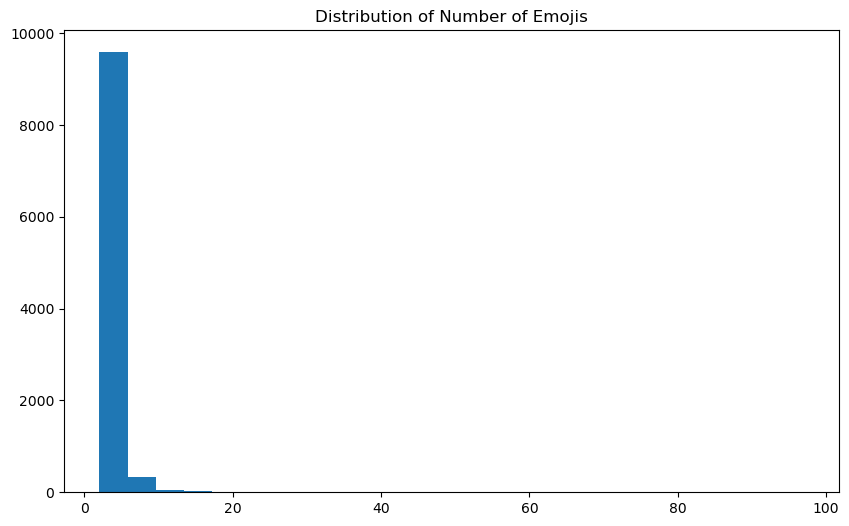

In [7]:
# ANSWER - Part 2: what does the distribution look like? Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(x=emoji_matrix.sum(axis=1), bins=25)
plt.title("Distribution of Number of Emojis")
plt.show()

- **[3 points]** Which emojis are most popular (i.e., used most frequently) in the dataset? Please return the top 5.

In [8]:
top_5_emojis = None
# ANSWER - which emojis are most popular (i.e., used most frequently) in the dataset?
top_5_emojis = emoji_matrix.sum().head(5)

# Display the result
top_5_emojis

☕    589
🌭    193
🌮    186
🌯     86
🌰     53
dtype: int64

## 2. The Apriori Algorithm [45 points]

Now, it is time to apply the Apriori algorithm to the emoji dataset. The documentation for the *apriori* function can be found at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/. 

a) **[10 points]** Using *apriori*, create a function, `emoji_frequent_itemsets()`, to find all the frequent k-itemsets with a minimal support of 'min_support' in the emoji dataset. In other words, `k` and `min_support` should be arguments that are passed when the function is called, in addition to the matrix itself.

Your function should return a Pandas DataFrame object with two columns: 
- The first one is named *'support'* and stores the support of the frequent itemsets. 
- The second column is named *'itemsets'* and stores the frequent itemset as a frozenset (the default return type of the apriori API).

Make sure that you are only returning the frequent itemsets that have the specified number of emojis (k).



In [9]:

# ANSWER - create & apply function
def emoji_frequent_itemsets(data, min_support=0.01, k=2):
    
    # Generate frequent itemsets
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    
    # Filter for itemsets with the specified number of emojis (k)
    frequent_k_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == k)]
    
    return frequent_k_itemsets[['support', 'itemsets']]


b) **[5 points]** Using this function, find all frequent 3-itemsets with a min support of **0.007**.

In [10]:
# ANSWER
emoji_frequent_3itemsets = emoji_frequent_itemsets(emoji_matrix, min_support= 0.007, k= 3)

# You can uncomment the following line to preview the result
emoji_frequent_3itemsets

c:\Users\Administrator\.conda\envs\conda_env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
155,0.0079,"(🍉, 🍊, 🍇)"
156,0.0092,"(🍟, 🍔, 🍕)"
157,0.0070,"(🍭, 🍬, 🍫)"
158,0.0117,"(🍹, 🍷, 🍸)"
159,0.0075,"(🍷, 🍺, 🍸)"
160,0.0076,"(🍷, 🍻, 🍸)"
161,0.0072,"(🍷, 🥂, 🍸)"
162,0.0072,"(🍹, 🍷, 🍺)"
163,0.0077,"(🍹, 🍷, 🍻)"
164,0.0070,"(🍹, 🍷, 🥂)"


### 2.1 Apriori Algorithm under the Hood [30 points]

In this part of the assignment, we are going to continue our exploration in mining frequent itemsets. Specifically, we are going to examine a few key steps in the Apriori algorithm.

#### 2.1.1 Candidate Generation

A critical step of the Apriori algorithm is **candidate generation**. That is, candidate *(k+1)*-itemsets should be generated from frequent *k*-itemsets. In the following exercise, we want you to generate candidate 3-itemsets based on the frequent 2-itemsets.

a) **[10 points]** You will need to construct a `generate_candidate_3_itemsets()` function, which takes in a list of frequent 2-itemsets and returns a list of the candidate 3-itemsets ("candidate" means that they may or may not be frequent). Please represent each itemset as a `set` in Python. Make sure that for each candidate 3-itemset in your returned list, at least one of its size-2 subset is a frequent 2-itemset, and your list does not contain duplicated itemsets.

We have prepared the frequent 2-itemsets for you, which you can load from the file named **itemsets_data/food_emoji_frequent_2_itemsets.csv**. We will evaluate your function by feeding in the loaded 2-itemsets and examining the return value. Note that the loaded 2-itemsets are different from what you will get with the `emoji_frequent_itemsets` function you implemented in the previous part, as we have eliminated the drink-related emojis to make the exercise more trackable.

You will receive full points if (1) every candidate 3-itemset in your returned list is a superset of at least one frequent 2-itemset, (2) every 3-itemset that has a frequent size-2 subset is already in your list, and (3) your list does not contain duplicated sets. 


In [ ]:
# ANSWER - Step 1: create function to generate candidates without pruning

def generate_candidate_3_itemsets():

In [ ]:
# ANSWER - Step 2: apply function to data

# load from file
frequent_2_itemsets = []
with open( ) as fin:
    for line in fin:

        
# obtain the return value
candidate_3_itemsets = generate_candidate_3_itemsets(frequent_2_itemsets)

# You can uncomment the following line to preview the generated candidate itemsets.
#candidate_3_itemsets

b) **[10 points]** Note that this pruning procedure won't give us the smallest set of candidates. Therefore, we can further prune the candidate itemsets by requiring all size-2 subsets of each candidate 3-itemset to be frequent. 

Think about the example you've seen in the lecture. Suppose {🍺, 🍼}, {🍺, 🍋}, {🍼, 🍭}, {🍼, 🍋} are all the frequent 2-itemsets. In the lecture, we said {🍺, 🍼, 🍋}, {🍺, 🍼, 🍭}, {🍼, 🍭, 🍋} are candidate 3-itemsets because each 3-itemset is a superset of at least one frequent 2-itemset. However, a larger itemset can never be frequent as long as one of its subset is not frequent. In this case, {🍺, 🍼, 🍭} can never been frequent because {🍺, 🍭} is not frequent. Neither can {🍼, 🍭, 🍋}, as the subset {🍭, 🍋} is not frequent. Ideally, we should be able to exclude the two candidate 3-itemsets {🍺, 🍼, 🍭} and {🍼, 🍭, 🍋} even without scanning the database for counting.

For this exercise, please prune your generated candidate 3-itemsets by requiring all their subsets to be frequent. You will receive full points for this part if the pruning is done correctly.

In [ ]:
# ANSWER - Step 1: create function to generate candidates with pruning

def generate_candidate_3_itemsets_pruned():


In [ ]:
# ANSWER - Step 2: apply function to data

# load from file
frequent_2_itemsets = []
with open( ) as fin:
    for line in fin:

        
# obtain the return value
candidate_3_itemsets_pruned = generate_candidate_3_itemsets_pruned(frequent_2_itemsets)

# You can uncomment the following line to preview the generated candidate itemsets.
#candidate_3_itemsets_pruned

#### 2.1.2 Database Scan

c) **[10 points]** With the candidate itemsets ready, the final step in one iteration of the Apriori algorithm is to scan the database (in our case, you can scan the `emoji_matrix` created above in 1.1c) and count the occurrence of each candidate itemset, divide it by the total number of records to derive the support, and output candidate itemsets whose support meets a chosen threshold.

To do so, please construct a new function, `calculate_frequent_itemsets()`, where the input (`candidate_itemsets`) is a list of the candidate 3-itemsets from the previous section. Your function should return a complete list of frequent 3-itemsets with a minimal support of `min_support` (i.e., an argument passed to the function). The returned list should not contain duplicated itemsets. The order of the list does not matter.

In [ ]:
# ANSWER - function to calculate support & return itemsets that meet the passed min_support value

def calculate_frequent_itemsets(candidate_itemsets, min_support=0.005):
    

calculate_frequent_itemsets(candidate_3_itemsets)

## 3. Evaluating Frequent Itemsets [25 points]

Even though you may have found all the frequent itemsets, not all of them are “interesting”. 

People have developed various measurements of the interestingness of patterns. Most of them split the itemset into an antecedent item(set) and a consequent item(set), and then measure the correlation between the antecedent and the consequent. Let's try some of such measurements implemented by the `mlxtend.frequent_patterns.association_rules` API. For more information about the API, visit the documentation at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/.

a) **[10 points]** First, apply the apriori function to `emoji_matrix` created in section 1.1c with a `min_support` of 0.005 and `use_colnames = True`. Then, apply the `association_rules` function to the result with `metric = "lift"` and `min_threshold = 3` (meaning to only return values where lift is equal to or greater than 3).

In [ ]:
emoji_frequent_itemsets = None
# ANSWER - Part 1: apply apriori

# Display the results
emoji_frequent_itemsets

In [ ]:
interestingness_measurements = None
# ANSWER - apply association_rules


# You can uncommentize the line below to preview the results
#interestingness_measurements.head()

b) **[10 points]** Next, we ask that you implement another interestingness measurement, the (full) mutual information. The measurement is defined as such:


The measurement is defined as:

$$I(X;Y)=\sum_{x\in\mathcal{X}}\sum_{y\in\mathcal{Y}} P(X=x, Y=y)\log_2\frac{P(X=x,Y=y)}{P(X=x)P(Y=y)}.$$

Note that the logarithm requires that the joint probability $P(X=x, Y=y) > 0$, which does not hold for some $(x, y)$. However, since we know that when $P(X=x, Y=y) = 0$, it would not contribute to the sum, you may assume $P(X=x, Y=y)\log_2\frac{P(X=x,Y=y)}{P(X=x)P(P=y)} = 0$ in that case. 

$x$, $y$ are possible values of $X$ and $Y$; in the case of appearance or absence of an item, 1 or 0. Therefore, we need to consider all possible combinations of $x$ and $y$, that is, $(X=1, Y=1)$, $(X=1, Y=0)$, $(X=0, Y=1)$, $(X=0, Y=0)$.

Please construct a function, `mi()`,  that uses the three support values ((1) antecedent support, (2) consequent support and (3) support) to compute the mutual information. All three parameters are in [0, 1], and you can assume the validity of the input. **Use 2 as the log base.**


In [ ]:
# ANSWER - create function to calculate MI

def mi(antecedent_support, consequent_support, support):
      
     

c) **[5 points]** Then, use this function to add the mutual information value to each row of the DataFrame (`interestingness_measurements`) above (i.e., the results of applying association_rules).

In [ ]:
# ANSWER - add MI to the dataframe and add a column ('mi') to contain the results
interestingness_measurements['mi'] = 

# You can uncommentize the line below to preview the results
#interestingness_measurements.sort_values('mi', ascending=False).head(n=5)

## 4. Itemset Similarity [10 points]

Recall that pattern and similarity are two basic outputs of data mining. So far, we have been playing with patterns - frequent itemsets and association rules can all be seen as "patterns". In the last part, let's work on itemset similarities.

### 4.1 Jaccard Similarity

Jaccard similarity is a simple but powerful measurement of itemset similarity, defined as follows:

$$\text{Jaccard_similarity(A, B)} = \frac{|A\cap B|}{|A\cup B|}$$

a) **[5 points]** Complete a function, `jaccard_similarity()`, to calculate the Jaccard similarity between two sets. You may assume that at least one of the sets is not empty.

In [ ]:
# ANSWER - function to calculate jaccard similarity
def jaccard_similarity(,):


b) **[5 points]** With this Jaccard similarity function, please calculate the Jaccard similarity between any given Tweet with all other Tweets and find the Tweets that are most similar (i.e., have the highest jaccard similarity values) in terms of the set of food/drink emojis used.

In [ ]:
# ANSWER - apply Jaccard similarity function to Tweets and add a column ('jaccard') to contain the results

tweets_df['jaccard'] =

# Display the top 10 results
tweets_df.sort_values('jaccard',ascending= ).head(n=10)

## Submission
All submissions should be made to Canvas electronically by 11:59 PM EST on September 26.

Here are the main deliverables:
- A PDF version of your executed Jupyter Notebook (submitted to `Homework1 Submission - pdf` on Canvas)

- The actual Jupyter notebook, so that we can check your results (submitted to `Homework 1 Submission - notebook` on Canvas)

Please make sure to provide appropriate conclusions drawn from the code/results throughout the notebook. 